# Predicting Real Estate Prices: Exploratory Data Analysis & Regression Modeling
### A comprehensive analysis of housing prices using exploratory data analysis (EDA) and machine learning regression models. This project applies data-driven techniques to uncover key market trends and build a predictive model for real estate valuation.

## Importing Necessary Libraries

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

In [55]:
# Set visualization style for consistency
sns.set_style("whitegrid")

In [56]:
# Load Datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Display first few rows
display(df_train.head())
display(df_test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Exploratory Data Analysis (EDA)

In [57]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [58]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [59]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [60]:
df_train[["SalePrice"]].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


[Text(0.5, 0, 'Property'), Text(0, 0.5, 'Sale Price')]

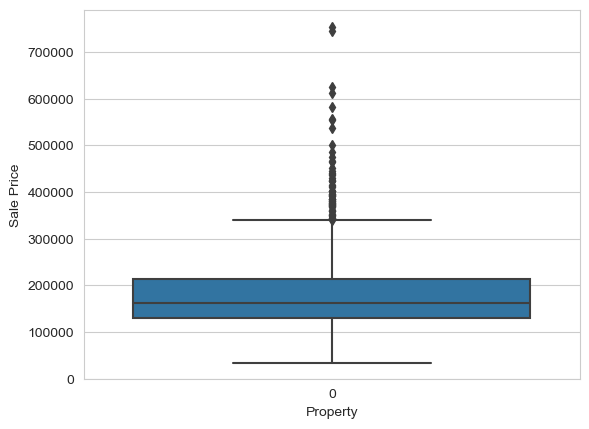

In [61]:
# Plot boxplot of the sale price to see the distribution of prices
ax = sns.boxplot(data=df_train["SalePrice"])
ax.set(xlabel='Property', ylabel='Sale Price')

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

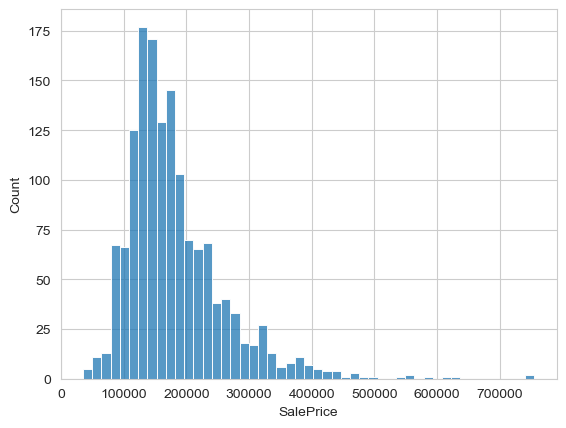

In [62]:
sns.histplot(data=df_train["SalePrice"])

#### Sales Price Distribution: 
The Interquartile Range (IQR) suggests that most houses are priced between **$128,975 and $214,000**, covering the middle 50% of house prices.

### Missing Values Analysis

In [63]:
# Missing Values Analysis
missing_data = df_train.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")


Id
False    1460
Name: Id, dtype: int64
 
MSSubClass
False    1460
Name: MSSubClass, dtype: int64
 
MSZoning
False    1460
Name: MSZoning, dtype: int64
 
LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64
 
LotArea
False    1460
Name: LotArea, dtype: int64
 
Street
False    1460
Name: Street, dtype: int64
 
Alley
True     1369
False      91
Name: Alley, dtype: int64
 
LotShape
False    1460
Name: LotShape, dtype: int64
 
LandContour
False    1460
Name: LandContour, dtype: int64
 
Utilities
False    1460
Name: Utilities, dtype: int64
 
LotConfig
False    1460
Name: LotConfig, dtype: int64
 
LandSlope
False    1460
Name: LandSlope, dtype: int64
 
Neighborhood
False    1460
Name: Neighborhood, dtype: int64
 
Condition1
False    1460
Name: Condition1, dtype: int64
 
Condition2
False    1460
Name: Condition2, dtype: int64
 
BldgType
False    1460
Name: BldgType, dtype: int64
 
HouseStyle
False    1460
Name: HouseStyle, dtype: int64
 
OverallQual
False    1460
Name: Over

<AxesSubplot:title={'center':'Missing Values Heatmap'}>

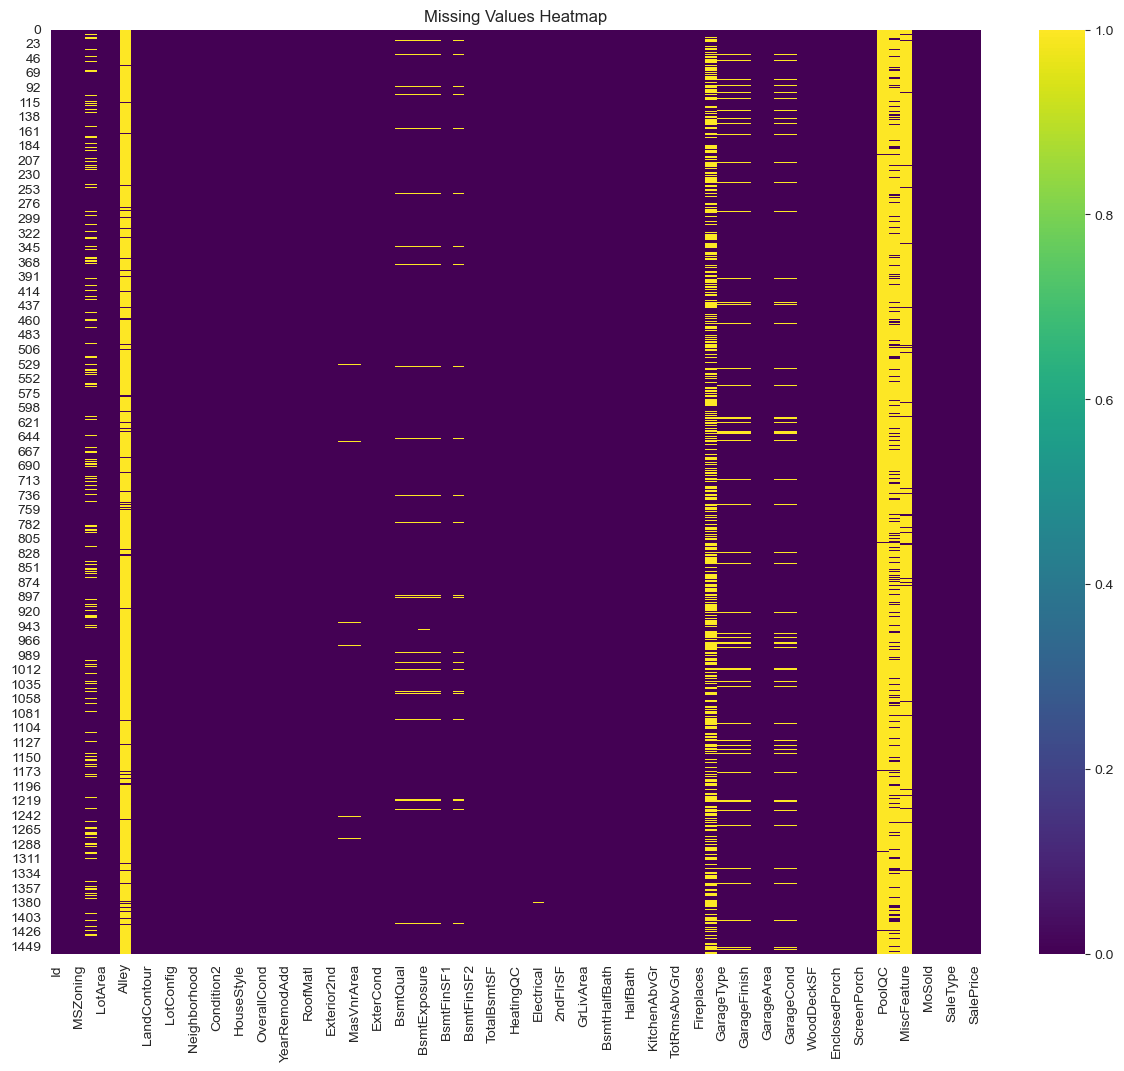

In [64]:
# Missing values heatmap
plt.figure(figsize=(15, 12))
plt.title("Missing Values Heatmap")
sns.heatmap(data = missing_data, cmap="viridis")

### Missing Values Recommendation
We will avoid using predictors that contain a significant number of missing values

## Basic Statistical Analysis

In [65]:
## Display Standard deviation of sale prices
df_train["SalePrice"].std()

79442.50288288663

In [66]:
## Display correlation Table 
correlation_table = df_train.corr()
pd.options.display.max_columns = None
display(correlation_table)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

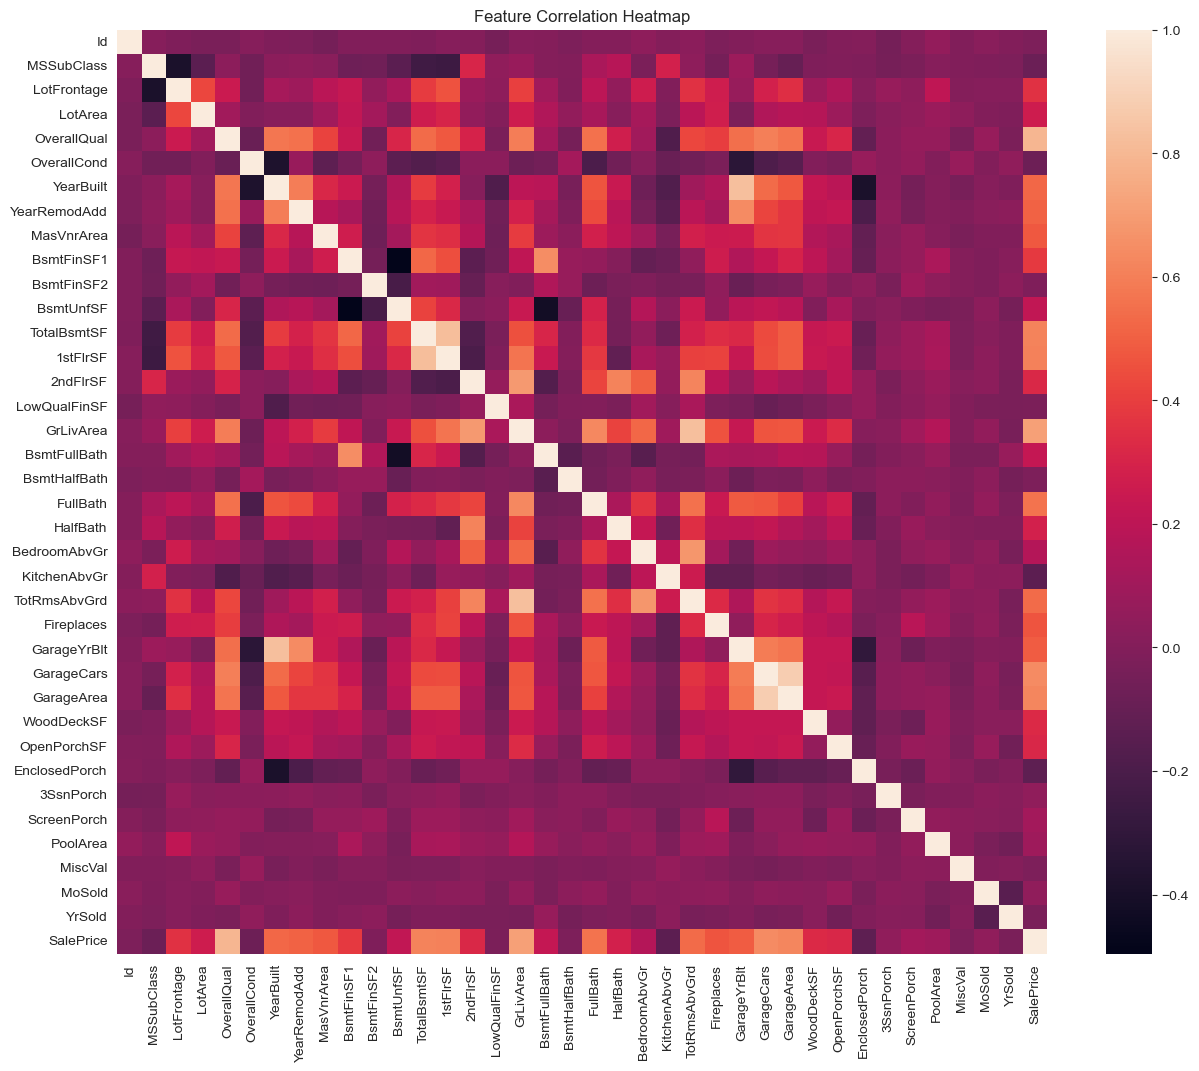

In [67]:
# Correlation Heatmap
plt.figure(figsize=(15, 12))  # Adjust width & height
sns.heatmap(correlation_table, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [68]:
for i in correlation_table:
    print(i)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [69]:
# filter for signfinicant correlations
correlated_features = []

for i in correlation_table:
    if (correlation_table.loc["SalePrice",i] > 0.5):
        correlated_features.append({"Feature": i, "Correlation_with_Price": correlation_table.loc["SalePrice",i]})
        # print(i)
        # print(correlation_table.loc["SalePrice",i])
        
correlated_features = pd.DataFrame(correlated_features) 
correlated_features  


,Feature,Correlation_with_Price
0,OverallQual,0.790982
1,YearBuilt,0.522897
2,YearRemodAdd,0.507101
3,TotalBsmtSF,0.613581
4,1stFlrSF,0.605852
5,GrLivArea,0.708624
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,GarageCars,0.640409
9,GarageArea,0.623431


In [70]:
# Dataframe of all independent variables with moderate to high correlation with price
df_correlates = df_train[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageArea"]]
df_correlates

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
0,7,2003,2003,856,856,1710,2,8,548
1,6,1976,1976,1262,1262,1262,2,6,460
2,7,2001,2002,920,920,1786,2,6,608
3,7,1915,1970,756,961,1717,1,7,642
4,8,2000,2000,1145,1145,2198,2,9,836
...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,460
1456,6,1978,1988,1542,2073,2073,2,7,500
1457,7,1941,2006,1152,1188,2340,2,9,252
1458,5,1950,1996,1078,1078,1078,1,5,240


### Single Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [72]:
lm = LinearRegression()
lm

LinearRegression()

In [73]:
X = df_train[["OverallQual"]]
Y = df_train[["SalePrice"]]

In [74]:
lm.fit(X,Y)

LinearRegression()

In [75]:
yhat = lm.predict(X)
yhat[0:5]

array([[221844.53863694],
       [176408.73604384],
       [221844.53863694],
       [221844.53863694],
       [267280.34123003]])

In [76]:
lm.intercept_

array([-96206.07951476])

In [77]:
lm.coef_

array([[45435.8025931]])

### R-Square and MSE of Simple Linear Model

In [78]:
# R^2
r2_sl1 = lm.score(X,Y)
print("The R^2 is:", r2_sl1)

The R^2 is: 0.6256518924621182


In [79]:
# MSE
mse_sl1 = mean_squared_error(X,Y)
print("The MSE is ", mse_sl1)

The MSE is  39036887066.921234


#### With our R-squared we can say that ~62.565% of variation of the price is explained by the simple linear model and we have a MSE of 39036887066.921234

(0.0, 795981.0555207031)

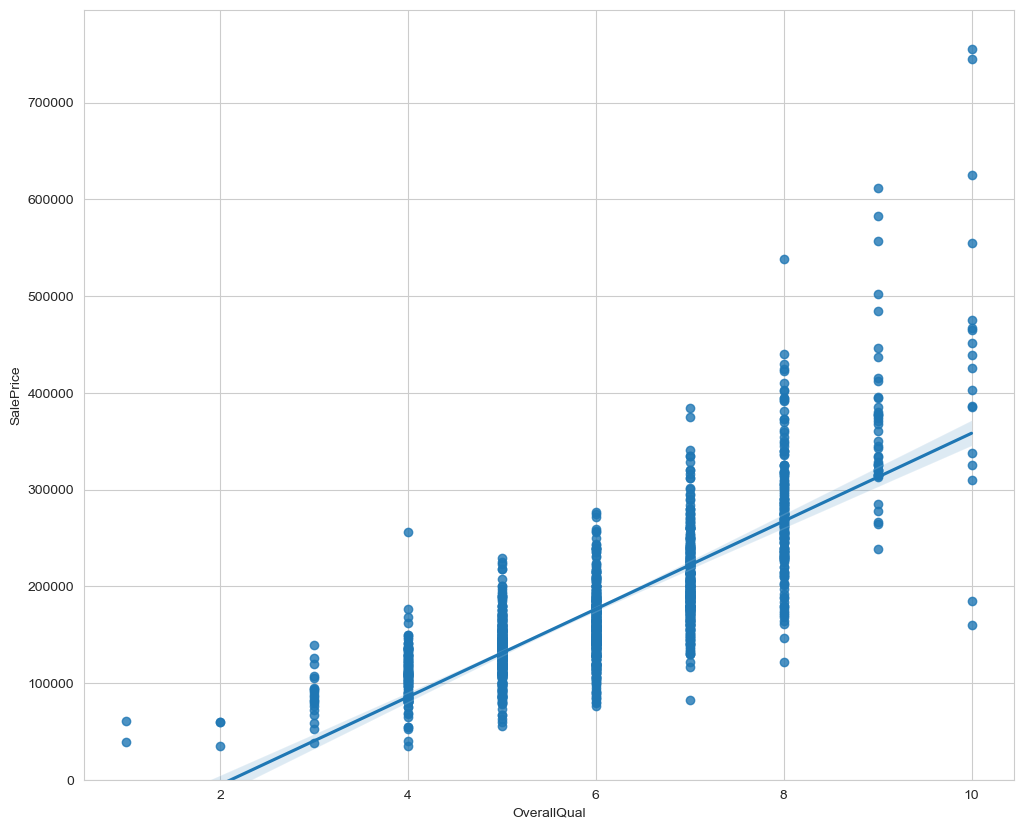

In [80]:
# Plot the linear regression
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="OverallQual", y="SalePrice", data=df_train)
plt.ylim(0,)

## Residual Plot
#### Required to verify if a higher degree regression is required to model the data for accurately

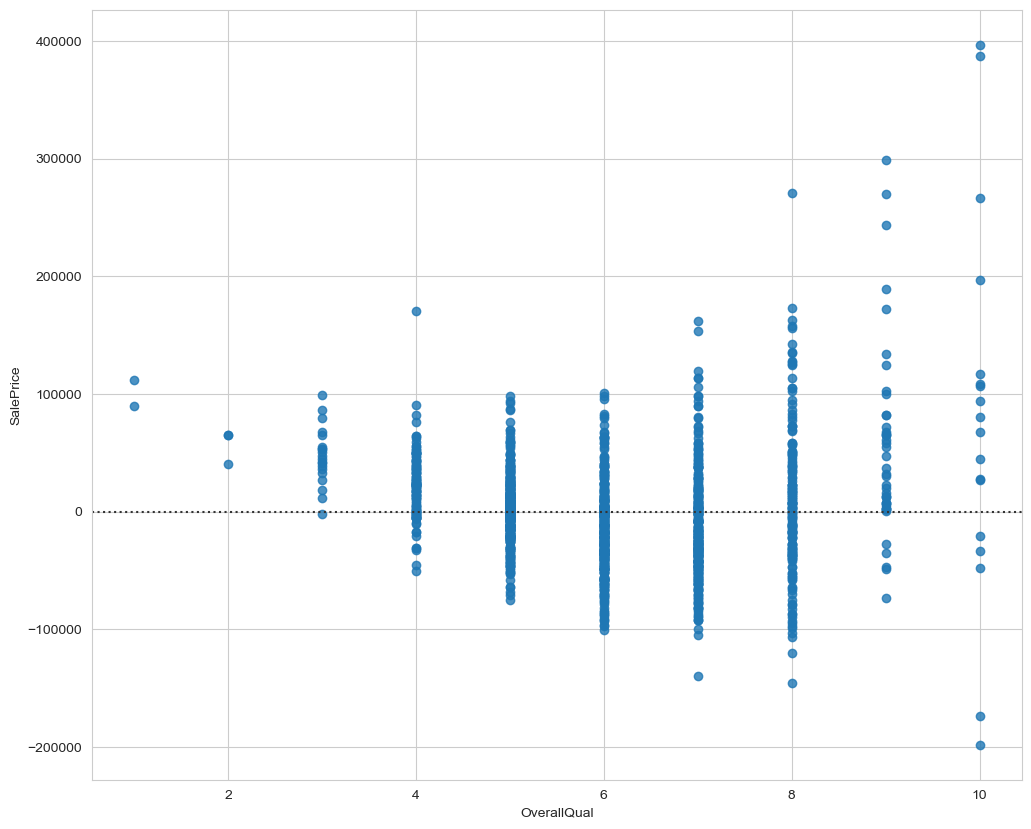

In [81]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df_train["OverallQual"], y=df_train["SalePrice"])
plt.show()

#### Insights from Residual plot
- Non linear distribution indicates we should model the data with a more complex function i.e., multiple linear regression or polynomial regression

## Multiple Linear Regression

In [82]:
# Identify Predictor Variables
X1 = df_train[["OverallQual", "OverallCond", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageCars"]]
# X1.isnull().value_counts()

In [83]:
lm.fit(X1, Y)

LinearRegression()

In [84]:
yhat1 = lm.predict(X1)

In [85]:
lm.intercept_

array([-842433.41232233])

In [86]:
lm.coef_

array([[ 2.10877415e+04,  2.39651546e+03,  3.74536719e+02,
         2.54581996e+01,  1.25837708e+01,  4.49600948e+01,
        -1.51423593e+03,  1.73453317e+04]])

#### R^2 and MSE of multiple Linear Regression

In [87]:
# R^2
r2_ml1 = lm.score(X1,Y)
print("The R^2 is:", r2_ml1)

The R^2 is: 0.7698315109037461


In [88]:
# MSE
mse_ml1 = mean_squared_error(Y, yhat1)
print("The MSE is ", mse_ml1)

The MSE is  1451623999.739349


#### With our R-squared we can say that ~76.983% of variation of the price is explained by the multiple linear model and we have a MSE of 1451623999.7393494

c:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


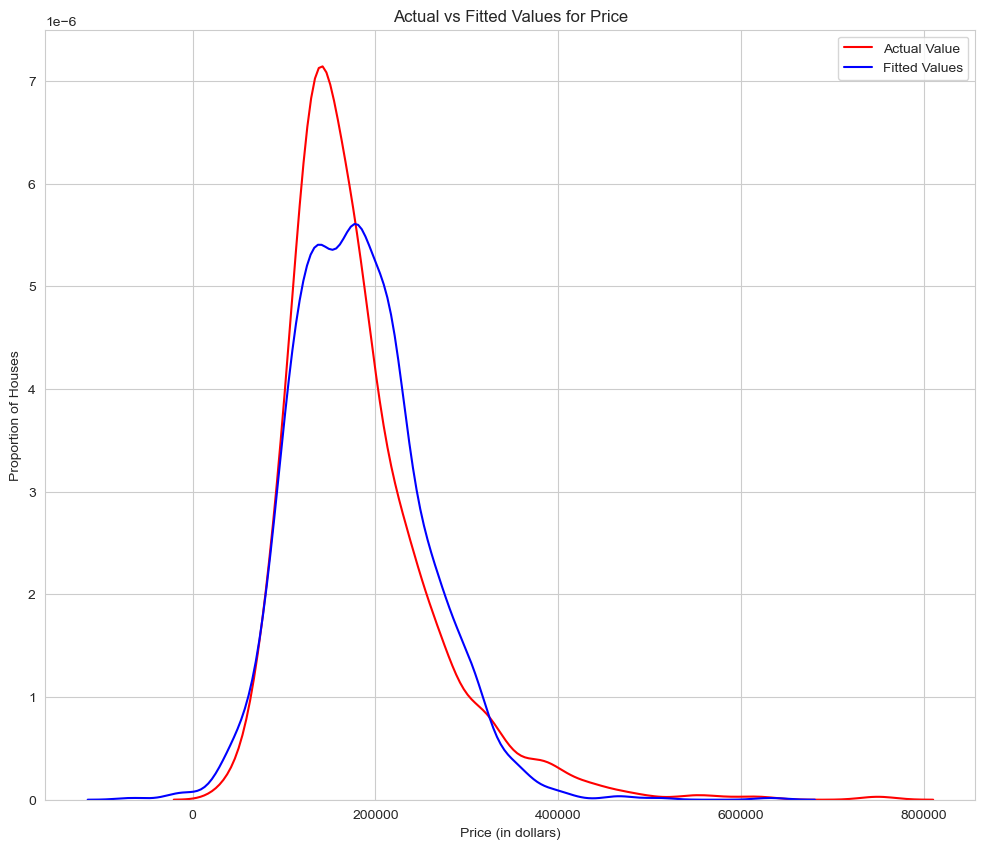

In [89]:
## Visualizing multiple linear regression with a distribution plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_train['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

plt.show()
plt.close()

### Multiple Linear Regression Distribution Plot Analysis
#### Observations
General Shape Alignment:
- The overall shape of the fitted values closely follows the actual values, indicating that your model captures the general distribution of house prices.
However, there’s a visible deviation where the fitted values consistently underestimate prices around the peak.

Peak Misalignment:
- The fitted distribution peaks lower and earlier than the actual data, suggesting the model might be underestimating the most common price range.

Tail Behavior (Right Side):
- The model appears to struggle with higher-priced properties. The fitted curve trails off faster than the actual distribution, meaning it may be underfitting high-value data points.

Skewness & Distribution Shape:
- Both distributions show positive skewness, common in house price data.
The model may struggle to fully capture this skew, resulting in a noticeable gap in higher price ranges.

#### Conclusions About the Model
- Potential Underfitting: The gap at the peak and the model's struggle to predict higher prices may indicate underfitting.
- Feature Engineering Opportunity: Important features like square footage, lot size, or neighborhood effects may need improved representation.
- Potential Data Imbalance: The dominance of lower-value properties may be influencing the model more heavily.

#### Next Steps:
- Create higher order polynomial model to capture more complexity

## Pre-processing and Plotting Pipeline for linear regression

In [90]:
Input=[('scale',StandardScaler()), ('model',LinearRegression())]

In [91]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [92]:
#convert the data to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs
df_train["OverallQual"] = df_train["OverallQual"].astype(float)
df_train["SalePrice"] = df_train["SalePrice"].astype(float)

In [93]:
# Look at how OverallQual impacts SalePrice
X = df_train[["OverallQual"]]
Y = df_train[["SalePrice"]]


In [94]:
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [95]:
#Fit the model (plot the model and draw a regression line)
lm.fit(X,Y)

LinearRegression()

In [96]:
yhat = lm.predict(X)
yhat
## Visualze same as above for single linear regression

array([[221844.53863694],
       [176408.73604384],
       [221844.53863694],
       ...,
       [221844.53863694],
       [130972.93345074],
       [130972.93345074]])

## Polynomial Regression with 1 feature

In [97]:
## We will use the following function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 10, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Houses')

    plt.show()
    plt.close()

In [98]:
X = df_train["OverallQual"]
Y = df_train["SalePrice"]

In [99]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)

       3        2
604.9 x - 4472 x + 2.693e+04 x + 3.283e+04


In [100]:
# p(X) representat the predicted values of our single variable polynomial regression for a given variable "X"
p(X)

array([209683.69283992, 164070.52167185, 209683.69283992, ...,
       209683.69283992, 131289.08150338, 131289.08150338])

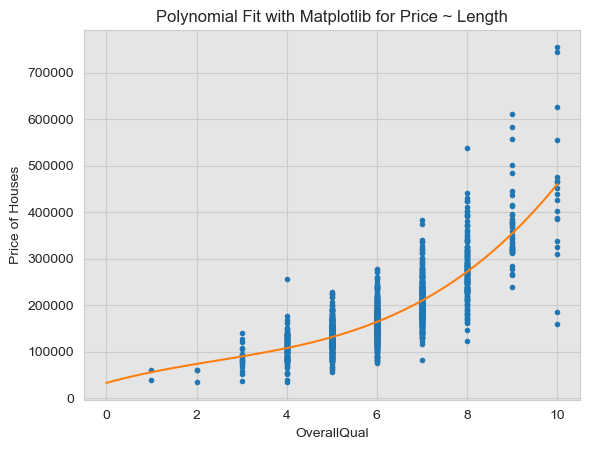

In [101]:
PlotPolly(p, X, Y, 'OverallQual')

#### Model Evaluation
- R^2
- MSE

In [102]:
# R^2
r2_sp1 = r2_score(Y, p(X))
print("R-square is: ", r2_sp1)

R-square is:  0.6815000790414094


In [103]:
# MSE
mse_sp1 = mean_squared_error(Y, p(X))
print("mse is: ", mse_sp1)

mse is:  2008711665.9362934


#### With our R-squared we can say that ~68.150% of variation of the price is explained by the single polynomial model and we have a MSE of 2008711665.9362934

## Polynomial Regression with Multiple features

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [106]:
X1_train = X1
X1_train

,OverallQual,OverallCond,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars
0,7,5,2003,856,856,1710,2,2
1,6,8,1976,1262,1262,1262,2,2
2,7,5,2002,920,920,1786,2,2
3,7,5,1970,756,961,1717,1,3
4,8,5,2000,1145,1145,2198,2,3
...,...,...,...,...,...,...,...,...
1455,6,5,2000,953,953,1647,2,2
1456,6,6,1988,1542,2073,2073,2,2
1457,7,9,2006,1152,1188,2340,2,1
1458,5,6,1996,1078,1078,1078,1,1


In [107]:
X1_test = df_test[["OverallQual", "OverallCond", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageCars"]]
X1_test = X1_test.astype(float)
X1_test.dropna(axis = 0, inplace= True)
X1_test.head()

,OverallQual,OverallCond,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars
0,5.0,6.0,1961.0,882.0,896.0,896.0,1.0,1.0
1,6.0,6.0,1958.0,1329.0,1329.0,1329.0,1.0,1.0
2,5.0,5.0,1998.0,928.0,928.0,1629.0,2.0,2.0
3,6.0,6.0,1998.0,926.0,926.0,1604.0,2.0,2.0
4,8.0,5.0,1992.0,1280.0,1280.0,1280.0,2.0,2.0


In [108]:
# Create Polynomial features
X1_train_pr=pr.fit_transform(X1_train)
X1_test_pr = pr.transform(X1_test)

In [109]:
# The original data contains 1460 samples and 8 features
X1_train.shape

(1460, 8)

In [110]:
# The data after the polynomial transform (after a polynomial function has been created to model the data), it contains 1460 samples and 45 features
X1_train_pr.shape

(1460, 45)

In [111]:
# Train the model
model = LinearRegression()
model.fit(X1_train_pr, Y)

LinearRegression()

In [112]:
# Make a prediction with the test set
y_pred = model.predict(X1_train_pr)

#### R-square and MSE of multiple polynomial Regression

In [113]:
# R^2
r2_mp1 = r2_score(df_train["SalePrice"], y_pred)
print("R-square is: ", r2_mp1)

R-square is:  0.8649891385746221


In [114]:
# MSE
mse_mp1 = mean_squared_error(df_train["SalePrice"], y_pred)
print("mse is: ", mse_mp1)

mse is:  851484959.7357492


#### With our R-squared we can say that ~86.499% of variation of the price is explained by the multiple polynomial model and we have a MSE of 851484959.7357492

### Model Evaluation
Generating the R^2 and MSE for single, muilple, and polynomial regressions

In [115]:
# Comparing R^2 and MSE Values for each model
print("Single Variable Linear Regression r-squared value of: {} and MSE of: {} ".format(r2_sl1, mse_sl1))
print("Mutilple Variable Linear Regression r-squared value of: {} and MSE of: {} ".format(r2_ml1, mse_ml1))
print("Single Variable Polynomial Regression r-squared value of: {} and MSE of: {} ".format(r2_sp1, mse_sp1))
print("Multiple Variable Polynomial Regression r-squared value of: {} and MSE of: {} ".format(r2_mp1, mse_mp1))

Single Variable Linear Regression r-squared value of: 0.6256518924621182 and MSE of: 39036887066.921234 
Mutilple Variable Linear Regression r-squared value of: 0.7698315109037461 and MSE of: 1451623999.739349 
Single Variable Polynomial Regression r-squared value of: 0.6815000790414094 and MSE of: 2008711665.9362934 
Multiple Variable Polynomial Regression r-squared value of: 0.8649891385746221 and MSE of: 851484959.7357492 


### Conclusions

Best Model: Multiple Variable Polynomial Regressin with Degree 2 using our highest correlated variables.

The following variables are highly correlated to price. "OverallQual", "OverallCond", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", and "GarageCars". The Interquartile Range (IQR) suggests that most houses are priced between **$128,975 and $214,000**, covering the middle 50% of house prices. The resiudual plot for Price and Overall quality indicated a need for a non-linear multivariate polynomial regression. We will explore this analsis in the next installment of this Housing Price Prediction

What more can be done? 
- Test various hyperperameters on the model to improve accuracy tweaking
- Use advanced data cleaning and standardization methods (normailzation, categorization, skewness and kurtosis, etc.)
- create functions that output necessary statistical information about a model including p value, MSE, R value, etc. 